In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있음

In [7]:
# 사과 정보 불러오기
# apple = fruits[fruits['name'] == 'apple']
apple = fruits[0:35]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [8]:
import matplotlib.pyplot as plt

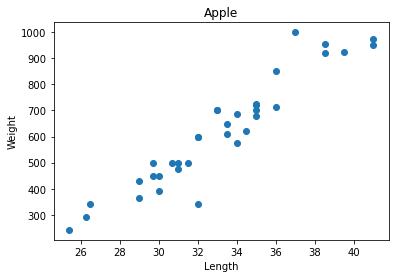

In [25]:
# apple 에 대한 산포도 그리기
# apple.plot(
#     kind = 'scatter',
#     x = 'length',
#     y = 'weight',
#     figsize = (7,4)
# )

# 또는 ==============
plt.scatter(
    apple['length'],
    apple['weight'],
)
plt.title("Apple")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [32]:
# 베리에 대한 산포도 그리기
# 베리 정보 불러오기
berry = fruits[35:]
berry = berry.reset_index(drop=True)
berry

,length,weight,name
0,9.8,6.7,berry
1,10.5,7.5,berry
2,10.6,7.0,berry
3,11.0,9.7,berry
4,11.2,9.8,berry
5,11.3,8.7,berry
6,11.8,10.0,berry
7,11.8,9.9,berry
8,12.0,9.8,berry
9,12.2,12.2,berry


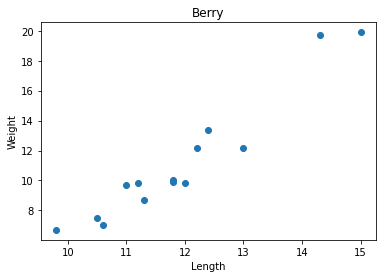

In [31]:
# berry 에 대한 산포도 그리기
plt.scatter(
    berry['length'],
    berry['weight'],
)
plt.title("Berry")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

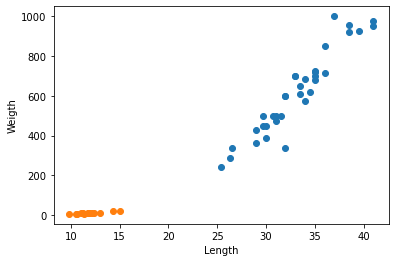

In [34]:
# 2개의 Dataset을 산포도로 한꺼번에 그리기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel('Length')
plt.ylabel('Weigth')
plt.show()

> 산포도를보니 분석가능하겠다!
> SVM 선가르기 하나만 하면 금방 하겠네 이런걸 회귀선 그리면 이상한거임

---
# 머신러닝을 위한 데이터 준비
### Feature Data와 Target Data의 분리

In [35]:
# Feature Data
fruitsData = fruits[['length','weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [36]:
# Target Data
fruitsTarget = fruits['name']
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

> 타겟이 시리즈네, DF가 아니라

--- 
최근접 이웃(KNN : K Nearest Neighbors) 분류 알고리즘 사용
- K = 주변의 값을 정하는 값이고 홀수로 지정함.
- 최근접 이웃 분류 알고리즘은 지도 학습이다.
- 범위가 잘 구분되어있는경우 KNN이 편하다

<!-- ![](../Data/knn-01.png) -->
<img src="../Data/knn-01.png"  width="400" height="200">

In [37]:
# KNeighborsClassifier 객관식  KNeighborsRegressor 주관식
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kn = KNeighborsClassifier() # n_neighbors = 5 <- 디폴트값이고 / 보통은 홀수로 입력 <- Hyper Parameter

In [39]:
# 학습시키기
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [40]:
# 정확성 확인하기
kn.score(fruitsData, fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다. 근데 좀... 느낌이 안좋아~

### 예측해 보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [50]:
kn.predict([[30,600]])

array(['apple'], dtype=object)

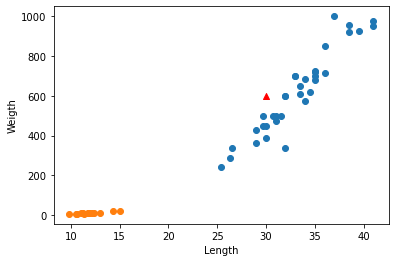

In [56]:
# 산포도 예측 범위 확인한기(이거 꼭 확인해야함!)

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.scatter(30,600,marker='^',c='red') # 예측한 값

plt.xlabel('Length')
plt.ylabel('Weigth')
plt.show()